# ANN | Handwritten Digit Recognition on the MNIST dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from numpy import ndarray
from copy import deepcopy

from IPython.display import display

In [2]:
# np.set_printoptions(precision=2)
np.set_printoptions(suppress=True, threshold=30)

In [3]:
mnist = scipy.io.loadmat("../raw-data/mnist.mat")
X: ndarray = mnist["X"]
y: ndarray = mnist["y"]

In [4]:
display(X.shape)
display(y.shape)

(5000, 400)

(5000, 1)

In [5]:
display(X[0])
display(X[0].shape)

array([0., 0., 0., ..., 0., 0., 0.])

(400,)

## Note

For the target variable, y, the class label is labelled as "10" for 0 (corresponding to the first 500 rows).


In [6]:
display(y[501:503])
display(y[1001:1003])

array([[1],
       [1]], dtype=uint8)

array([[2],
       [2]], dtype=uint8)

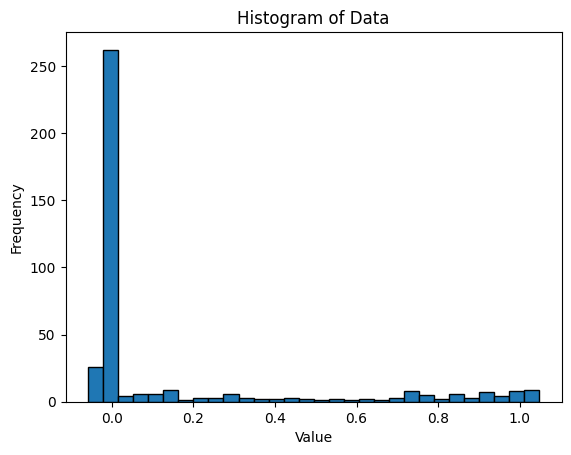

In [7]:
plt.hist(
    X[0], bins=30, edgecolor="black"
)  # bins parameter specifies the number of bins
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Data")
plt.show()

In [8]:
def plot_first_x_images(arr: ndarray) -> None:
    digits = arr.reshape(-1, 20, 20)

    fig, axes = plt.subplots(4, 4, figsize=(6, 6))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        # transpose, because if not transposed, the image will be shown
        # reflected along the diagonal
        ax.imshow(digits[i].T, cmap="Greys", interpolation=None)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

## EDA

checking that the X's corresponding to their actual y's


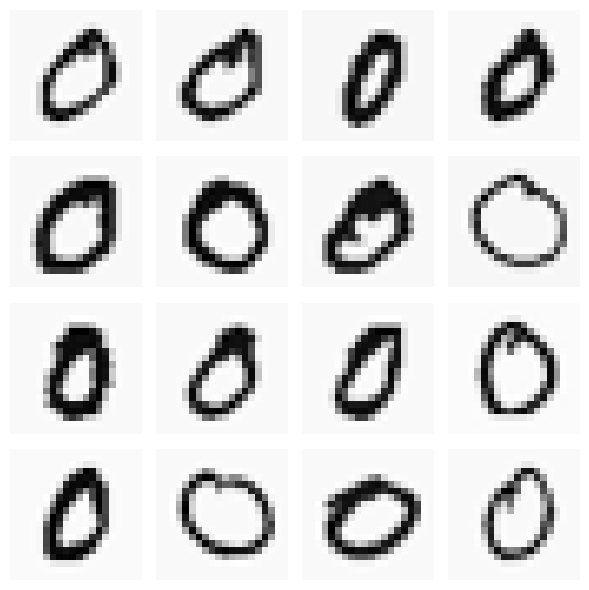

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
      dtype=uint8)

In [9]:
samples = X[:16]
plot_first_x_images(samples)
display(y[:16].flatten())

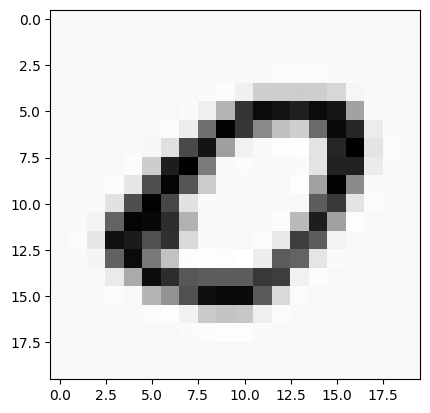

In [10]:
plt.imshow(X[0].reshape((20, 20)), cmap="Greys", interpolation=None)
plt.show()

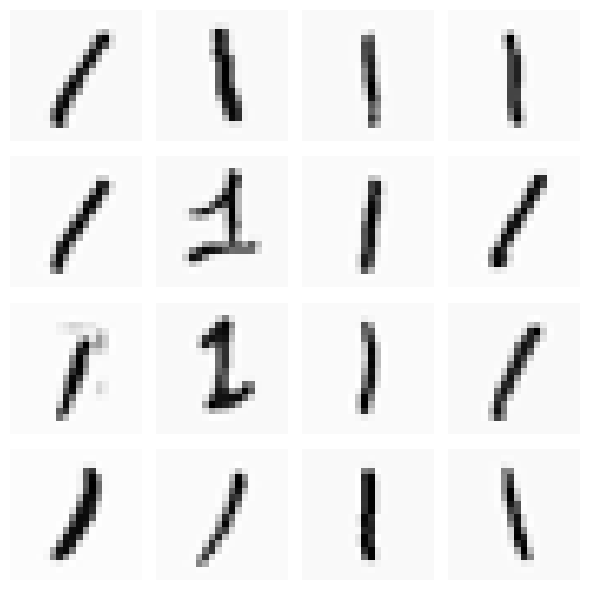

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [11]:
samples = X[500:516]
plot_first_x_images(samples)
display(y[500:516].flatten())

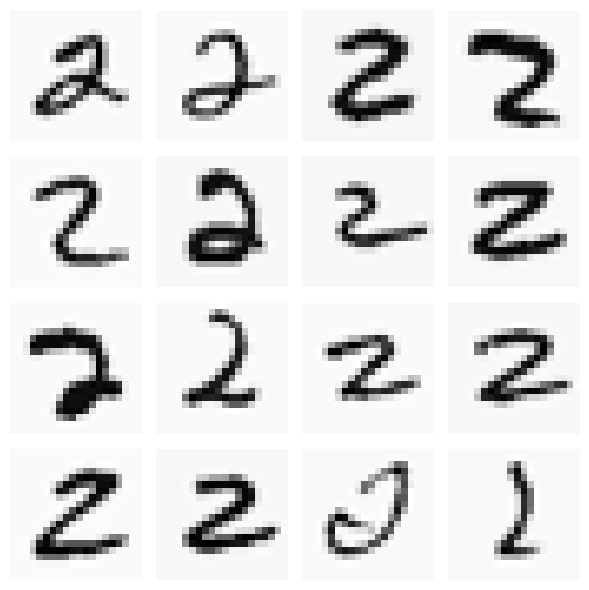

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=uint8)

In [12]:
samples = X[1000:1016]
plot_first_x_images(samples)
display(y[1000:1016].flatten())

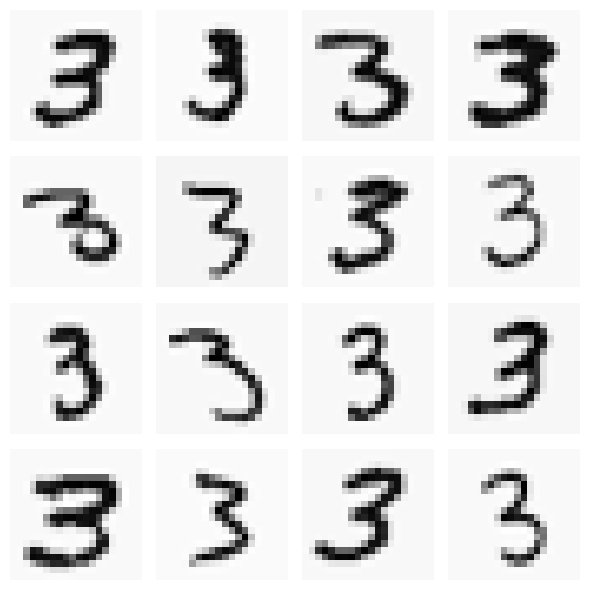

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

In [13]:
idx_lower = 1500
idx_upper = idx_lower + 16
samples = X[idx_lower:idx_upper]
plot_first_x_images(samples)
display(y[idx_lower:idx_upper].flatten())

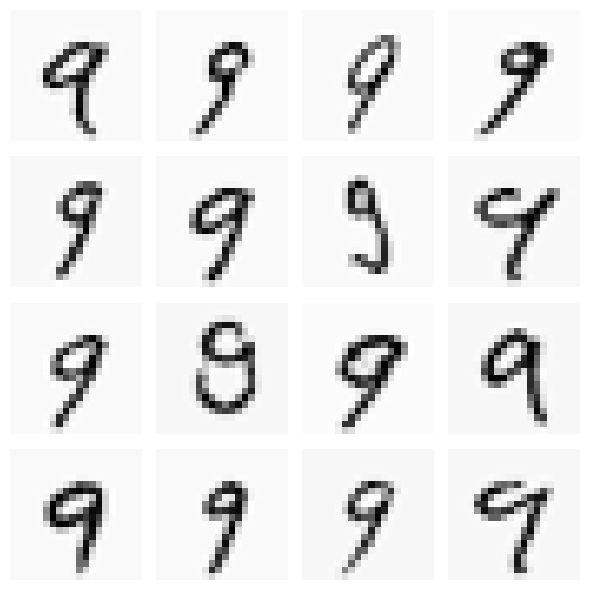

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=uint8)

In [14]:
digit = 9
idx_lower = digit * 500
idx_upper = idx_lower + 16
samples = X[idx_lower:idx_upper]
plot_first_x_images(samples)
display(y[idx_lower:idx_upper].flatten())

# Activation Function


In [15]:
def sigmoid(z: ndarray | float, calculate_derivative=False) -> ndarray | float:
    """
    Args:
        v (np.ndarray | float): Net Internal Activity of the neuron
        calculate_derivative (bool, optional):

    Returns:
        np.ndarray | float
    """
    if calculate_derivative:
        # return np.exp(z) / (np.exp(z) + 1) ** 2
        return sigmoid(z) * (1 - sigmoid(z))

    return 1 / (1 + np.exp(-z))

In [25]:
def sigmoid_prime(z: ndarray | float) -> ndarray | float:
    """This assumes that z is already the activation, i.e. already went through normal sigmoid

    Args:
        z (ndarray | float): _description_

    Returns:
        ndarray | float: _description_
    """
    return z * (1 - z)

## Tests for the activaton function


In [17]:
# should be 0.49000133312003097
print("tests for logistic function")
res10 = sigmoid(z=-0.04)
print(res10)
# 0.2499000266606
res10_prime = sigmoid(z=-0.04, calculate_derivative=True)
print(res10_prime)
print("------------")

tests for logistic function
0.4900013331200346
0.24990002666062347
------------


# Gradient Descent and Backpropagation Formulas

Backpropagation algorithm: the weight adjustment is proportional to the instantaneous gradient:
$$ \Delta {w}_{ji}(n) = -\eta \frac{\partial \mathcal{L}(n)}{\partial w_{ji}(n)} $$

---

## Local Gradients / local errors / small delta $δ$

### Gradient (for output neurons):

$$\frac{\partial \mathcal{L}(n)}{\partial w_{j i}(n)}=\frac{\partial \mathcal{L}(n)}{\partial e_j(n)} \frac{\partial e_j(n)}{\partial y_j(n)} \frac{\partial y_j(n)}{\partial v_j(n)} \frac{\partial v_j(n)}{\partial w_{j i}(n)}$$

Computing for the partial derivatives, we get:  
$$\frac{\partial \mathcal{L}(n)}{\partial w_{j i}(n)}=-e_j(n) \varphi^{\prime}\left(v_j(n)\right) y_i(n)$$

However, a portion of the formula can be reused for the calculations of the gradients of the layers before the current layer, we call this term $\delta$, it also happens that $\delta$ kind of acts like a local error:  
$$\delta_j(n)=e_j(n) \varphi^{\prime}\left(v_j(n)\right)$$

For example, for the logistic function, this is what we get for $\delta$:  
$$\delta_j(n)= [d_j(n) - o_j(n)] \cdot a \cdot o_j(n) \cdot [ 1- o_j(n) ]$$
where $$ \varphi^{\prime}\left(v_j(n)\right) = a \cdot o_j(n) \cdot [ 1- o_j(n) ]$$

We also get the formula for the weight adjustment:

$$\Delta {w}_{ji}(n) = \eta {\delta_j}^{(l)}(n) {y_i}^{(l-1)}(n)$$

---

### Gradient (for hidden neurons):

$$\delta_j(n)= \varphi^{\prime} (v_j) \sum_k {\delta_k}^{(l+1)} {w_{kj}}^{(l+1)} $$


# Main Code: Artificial Neural Network

Multilayer Perceptron

## TODO:

- transfer code from python file


In [53]:
class MLP:
    """Multilayer Perceptron"""

    def __init__(
        self,
        layer_sizes: list[int] | None = None,
        random_seed: float = 1,
    ) -> None:
        np.random.seed(random_seed)

        self.layer_sizes = [400, 25, 10] if not layer_sizes else layer_sizes

        self.weights = [
            # + 1 to account for the bias
            np.random.randn(right_layer, left_layer + 1)
            for (right_layer, left_layer) in zip(
                self.layer_sizes[1:], self.layer_sizes[:-1]
            )
        ]

        self.previous_deltas = (
            []
        )  # Note: might not be nec since we're not doing alpha anyway

    def display_network_info(self) -> None:
        for idx, weight in enumerate(self.weights):
            print(f"--- {idx+1}th layer: ")
            print(
                f"""shape: {weight.shape}, {weight.shape[0]} neurons
                    with {weight.shape[1] - 1} weights and 1 bias each"""
            )

        print("(Note: the first weight accounts for the bias)")

    def forward(self, X: ndarray, debug: bool = False) -> list[ndarray]:
        """Perform a forward pass from the input layer to the output layer

        Args:
            X (ndarray): Data for the input neurons
            debug (bool, optional)

        Returns:
            list[ndarray]: activations for all the layers (input to output)
        """
        # a = activation
        a = X.copy()
        activations = []

        for idx, weight in enumerate(self.weights):
            if idx == 0:
                # append 1 to account for the bias
                # this also makes it so that they both have the same shapes
                # a: ndarray = sigmoid(np.dot(np.append(1, X), weight))
                a: ndarray = sigmoid(np.dot(weight, np.append(1, X)))
            elif idx > 0:
                # a: ndarray = sigmoid(np.dot(np.append(1, a), weight))
                a: ndarray = sigmoid(np.dot(weight, np.append(1, a)))
            activations.append(a)
        return activations

    def backward(self, y_train: ndarray, activations: list[ndarray]):
        """Perform one backpropagation pass

        Args:
            y_train (ndarray): class labels for the training data
            activations (ndarray): activations for all of the layers starting
                                   with the input to the output layer
        """
        output_activations = activations[-1]
        weights = deepcopy(self.weights)
        weights.reverse()

        num_output_neurons = len(output_activations)
        one_hot = np.zeros(num_output_neurons)  # desired outputs

        # TODO: remove
        fake_one_hot_from_201 = np.array([0.83, 0.74])

        # e = d - y
        output_error = fake_one_hot_from_201 - output_activations

        # reverse the activations so that we start with the output layer
        activations.reverse()

        small_deltas = []
        for idx, activation in enumerate(activations):
            # calculate the local gradients

            if idx == 0:
                # for the output layer, δ = e * φ'
                delta_out = output_error * sigmoid_prime(z=activation)
                small_deltas.append(delta_out)

            else:
                # for hidden layers, δ = φ' * Σ [δ^(l+1) *w^(l+1) ]
                # [:,1:] removes the biasing term, w_0 from the dot product
                # note that the summation can be computed as a dot produt
                delta_hidden = np.dot(
                    # idx - 1 refers to the deltas and weights @ the next layer
                    # or if going from output to input, the "previous" layer
                    small_deltas[idx - 1],
                    weights[idx - 1][:, 1:],
                ) * sigmoid_prime(z=activation)
                small_deltas.append(delta_hidden)

        # Calculate the large deltas, maybe you can do that inside the for loop as well

    def SGD_fit(
        self,
        eta: float,
        epochs: int,
        X_train: ndarray,
        y_train: ndarray,
        X_validation: ndarray,
        y_validation: ndarray,
        mini_batch_size=8,
        debug=False,
    ):
        train_x = X_train.copy()
        train_y = y_train.copy()

        training_data = list(zip(train_y, train_x))
        for nth_epoch in range(epochs + 1):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[i : i + mini_batch_size]
                for i in range(0, len(training_data), mini_batch_size)
            ]

            for mini_batch in mini_batches:
                # process mini batch
                self.process_mini_batch(mini_batch=mini_batch)

                if debug:
                    break

                # calculate metrics

    def process_mini_batch(self, mini_batch):
        # TODO: not yet tested
        mini_batch_deltas = []

        for y_train, X_train in mini_batch:
            # forwards pass
            y_out = self.forward(X=X_train)

            # backward pass, result should be the weight updates
            # i.e. the Delta weights for the specific training example
            # where we get an np array of all the weight changes across all layers
            Delta_weights = self.backward(y_train=y_train, activations=y_out)
            mini_batch_deltas.append(Delta_weights)

        # calc the mean of the weigh updates across all training
        # examples in the mini batch
        mini_batch_deltas = np.array(mini_batch_deltas)
        Delta_weights_means = np.mean(mini_batch_deltas, axis=1)  # TODO: not yet tested

        # update the weights based on that mean
        self.weights = [
            layer_weights + Delta_weight
            for layer_weights, Delta_weight in zip(self.weights, Delta_weights_means)
        ]

    def predict(self, X: ndarray):
        pass

    def save_weights(self, filename: str) -> None:
        pass

    def load_weights(self, weights: list[ndarray]) -> None:
        assert len(self.weights) == len(weights)
        self.weights = weights

# MLP Instance


In [19]:
network = MLP(layer_sizes=[400, 25, 10])
# test = MLP(layer_sizes=[400, 25, 25, 10])
# test.layer_sizes

In [20]:
network.display_network_info()

--- 1th layer: 
shape: (25, 401), 25 neurons
                    with 400 weights and 1 bias each
--- 2th layer: 
shape: (10, 26), 10 neurons
                    with 25 weights and 1 bias each
(Note: the first weight accounts for the bias)


In [21]:
network.weights[0]

array([[ 1.62434536, -0.61175641, -0.52817175, ..., -0.03536792,
         2.11060505, -1.30653407],
       [ 0.07638048,  0.36723181,  1.23289919, ..., -0.32420422,
         0.81434313,  0.78046993],
       [-1.46405357, -0.15449119, -0.09243232, ..., -0.53903258,
         0.64409999,  0.18363357],
       ...,
       [-0.76813151,  0.79686957, -0.23686861, ..., -1.47720697,
        -1.06829106, -0.56843461],
       [ 0.24497576,  0.71976094, -0.98197244, ..., -0.64810988,
        -1.25152625,  0.57021043],
       [ 0.24582697,  0.76680739,  0.40632739, ...,  0.47031271,
         0.89412553,  1.51991551]])

# MLP Forward pass test


In [22]:
l1_weights = np.array(
    [
        [-0.7, 0.1, 0.4, -0.6],
        [-0.8, 0.3, 0.7, -0.4],
        [-0.9, -0.9, 0.3, -0.6],
        [-0.4, -0.8, 0.7, 0.2],
    ]
)

l2_weights = np.array(
    [
        [-0.7, -0.3, 0.8, -0.9, 0.4],
        [-0.6, -0.4, -0.2, 0.7, -0.3],
        [0.4, 0.4, -0.7, 0.8, -0.3],
    ]
)

out_weights = np.array([[-0.6, 0.8, -0.3, 0.7], [-0.4, -0.6, 0.7, 0.3]])

display(l1_weights.shape)
display(l2_weights.shape)
display(out_weights.shape)

(4, 4)

(3, 5)

(2, 4)

In [54]:
testing = MLP(layer_sizes=[3, 4, 3, 2])
testing.load_weights(weights=[l1_weights, l2_weights, out_weights])
testing.display_network_info()

--- 1th layer: 
shape: (4, 4), 4 neurons
                    with 3 weights and 1 bias each
--- 2th layer: 
shape: (3, 5), 3 neurons
                    with 4 weights and 1 bias each
--- 3th layer: 
shape: (2, 4), 2 neurons
                    with 3 weights and 1 bias each
(Note: the first weight accounts for the bias)


## backward test


In [55]:
all_activations = testing.forward(X=[0.4, 0.5, -0.7])
testing.backward(y_train=np.ndarray([]), activations=all_activations)
# should equal 0.5019898612 and 0.4476699584
# all_activations

idx: 0 | 
idx: 1 | 
small deltas
[0.08200124 0.07228198]
weights
[[ 0.8 -0.3  0.7]
 [-0.6  0.7  0.3]]
idx: 2 | 
small deltas
[0.00507504 0.00561906 0.01896544]
weights
[[-0.3  0.8 -0.9  0.4]
 [-0.4 -0.2  0.7 -0.3]
 [ 0.4 -0.7  0.8 -0.3]]
final small deltas: 
[array([0.08200124, 0.07228198]), array([0.00507504, 0.00561906, 0.01896544]), array([ 0.00095363, -0.00258328,  0.00323409, -0.00125307])]


# Formula for Error Computation

The instantaneous sum of square errors $\mathcal{L}(n)$ of the network is

$$
\mathcal{L}(n) = \frac{1}{2} \sum_{j \in C} {e_j}^2(n)
$$

where $C$ is the set of all output neurons of the network. and $e =  y - \hat{y}$ where $\hat{y}$ is the predicted output

---

# General Formula (Eror computation):

For the N input patterns in the training set, the average squared error for the entire training set is

$$
  \mathcal{L}_{av}  =  \frac {1}{N}  \sum _ {n=1}^ {N}  \mathcal{L}  (n)=  \frac {1}{2N}  \sum _ {n=1}^ {N}  \sum  {e_{j}}^{2} (n)
$$
